In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


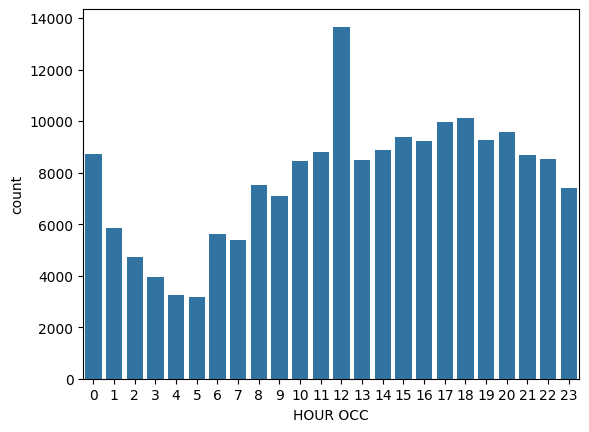

0    12
Name: HOUR OCC, dtype: int64

In [4]:
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
crimes["HOUR OCC"]

sns.countplot(x = "HOUR OCC", data = crimes)
plt.show()

peak_crime_hour = crimes['HOUR OCC'].mode()
peak_crime_hour

In [6]:
crimes["TIME OCC"] = crimes["TIME OCC"].astype(str).str.zfill(4)

# Convert 'Time_Occ' from "HHMM" format to datetime.time
crimes["TIME OCC"] = pd.to_datetime(crimes["TIME OCC"], format='%H%M').dt.time

# Filter for crimes committed between 10 PM and 3:59 AM
time_filtered = crimes[(crimes["TIME OCC"] >= pd.to_datetime('22:00', format='%H:%M').time()) | 
                   (crimes["TIME OCC"] <= pd.to_datetime('03:59', format='%H:%M').time())]

# Group the filtered data by 'Location' and count occurrences
crime = time_filtered.groupby("LOCATION").size()

# Find the location with the highest count of night crimes
peak_night_crime_location = crime.idxmax()

print(f"The area with the most night crimes is: {peak_night_crime_location}")

The area with the most night crimes is: 600 S  SPRING                       ST


In [8]:
import numpy as np
bins = [0, 17, 25, 34, 44, 54, 64, np.inf]  # Age groups
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]  # Labels

crimes['Age_Bracket'] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels, right=True)

# Display the DataFrame with the new 'Age Bracket' column
crimes.head()

victim_ages = crimes['Age_Bracket'].value_counts().sort_index()

# Display the Series with age brackets and their counts
print(victim_ages)

Age_Bracket
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64


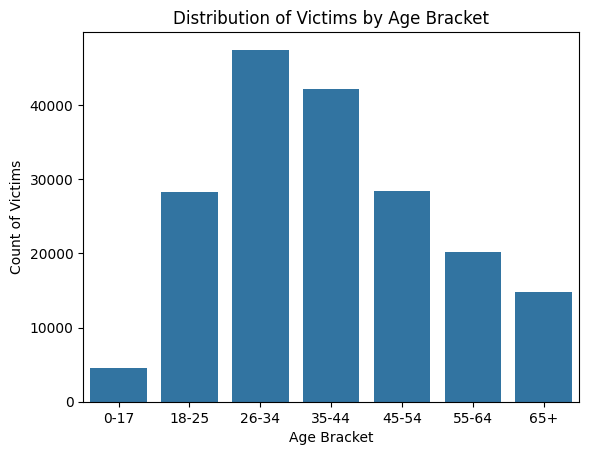

In [10]:
sns.barplot(x=victim_ages.index, y=victim_ages.values)

# Set plot labels and title
plt.xlabel('Age Bracket')
plt.ylabel('Count of Victims')
plt.title('Distribution of Victims by Age Bracket')

plt.show()